# 7 methods to perform Time Series forecasting

https://www.analyticsvidhya.com/blog/2018/02/time-series-forecasting-methods/

Date: 15 May 2020

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling
%matplotlib inline

## Importing data

In [361]:
df = pd.read_csv("/home/garvit/Datasets/forecasting/Time_Series_Analysis-master/Train.csv")

# Index 11856 marks the end of year 2013
# (Subsetting the dataset)
df = pd.read_csv("/home/garvit/Datasets/forecasting/Time_Series_Analysis-master/Train.csv", nrows = 11856)
df.head(4)

#Creating train and test set 
#Index 10392 marks the end of October 2013

train = df.iloc[0:10392,:]
test = df.iloc[10392:,:]

#Aggregating the dataset at daily level
df['Timestamp'] = pd.to_datetime(df['Datetime'], format='%d-%m-%Y %H:%M')
df.index = df['Timestamp']
df = df.resample('D').mean()

train['Timestamp'] = pd.to_datetime(train['Datetime'],format='%d-%m-%Y %H:%M') 
train.index = train['Timestamp'] 
train = train.resample('D').mean() 

test['Timestamp'] = pd.to_datetime(test['Datetime'],format='%d-%m-%Y %H:%M') 
test.index = test['Timestamp']
test = test.resample('D').mean()



In [322]:
# train = pd.read_csv('/home/garvit/Datasets/walmart-recruiting-store-sales-forecasting/train.csv')
# stores = pd.read_csv('/home/garvit/Datasets/walmart-recruiting-store-sales-forecasting/stores.csv')
# features = pd.read_csv('/home/garvit/Datasets/walmart-recruiting-store-sales-forecasting/features.csv')

# # merging dataset
# temp = pd.merge(left= train, right= features, on= ['Store', 'Date'], how= 'inner')
# data = temp.merge(stores, on=['Store'], how = 'inner')

# # droping duplicate column
# data.drop('IsHoliday_y', axis = 1, inplace  = True)
# data = data.rename(columns = {'IsHoliday_x' : 'IsHoliday'})

# # handelling NaN values
# data = data.fillna(0)
# data = data[['Date', 'Weekly_Sales']].copy()

# # train and test dataset


# data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d %H:%M')
# data.rename(columns= {'Weekly_Sales':'Count'}, inplace=True)
# data.index = data['Date']
# data = data.drop(['Date'], 1)
# data = data.resample('W').sum()
# train = data.iloc[:104,:]
# test  = data.iloc[103:,:]

# # train


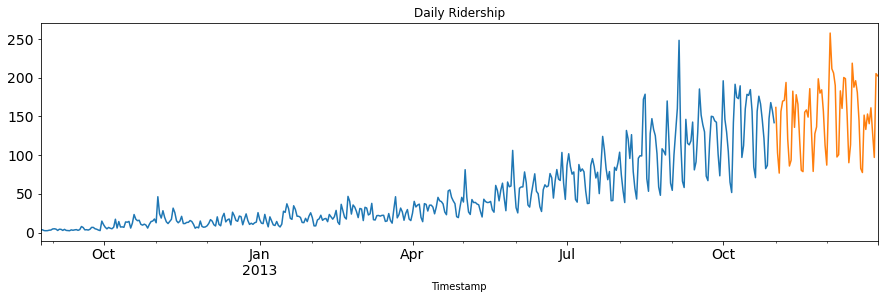

In [362]:
#Plotting data
train['Count'].plot(figsize=(15,4), title= 'Daily Ridership', fontsize=14)
test['Count'].plot(figsize=(15,4), title= 'Daily Ridership', fontsize=14)
plt.show()

## Method 1: Naive Method

Consider the graph given below. Let’s assume that the y-axis depicts the price of a coin and x-axis depicts the time (days).

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2018/02/naive_new-768x495.png" alt="Drawing" style="width: 350px;"/>


We can infer from the graph that the price of the coin is stable from the start.
Many a times we are provided with a dataset, which is stable throughout it’s time period. If we want to forecast the price for the next day, we can simply take the last day value and estimate the same value for the next day. Such forecasting technique which assumes that the next expected point is equal to the last observed point is called **Naive Method**.


<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2018/01/Screen-Shot-2018-01-25-at-7.45.20-PM.png" alt="Drawing" style="width: 170px;"/>

Now we will implement the Naive method to forecast the prices for test data.

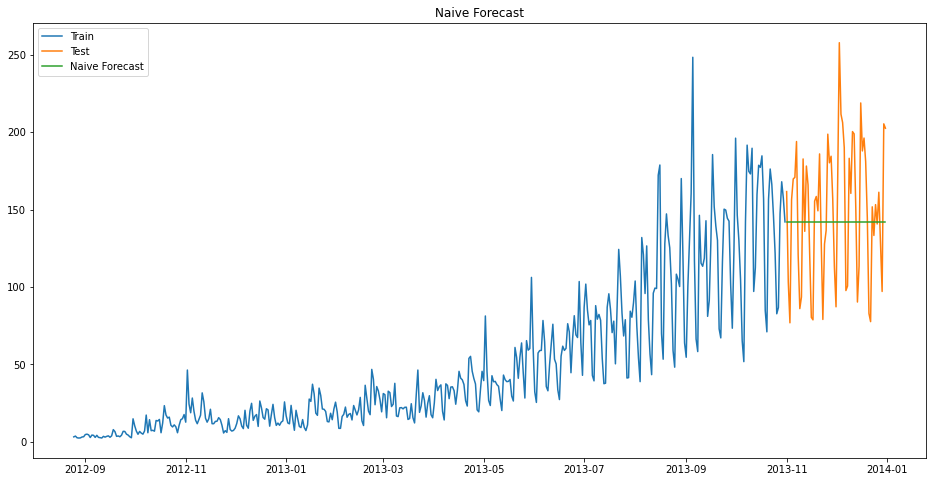

In [364]:
# Naive Method

dd = np.asarray(train['Count'])
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1] # fetching last day value and estimate the same value for the next day
plt.figure(figsize=(16,8))
plt.plot(train.index, train['Count'], label='Train')
plt.plot(test.index, test['Count'], label='Test')
plt.plot(y_hat.index, y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()


We will now calculate RMSE to check to accuracy of our model on test data set.

In [365]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(test['Count'], y_hat['naive']))
print(rms)

43.91640614391676


We can infer from the RMSE value and the graph above, that Naive method isn’t suited for datasets with high variability. It is best suited for stable datasets. We can still improve our score by adopting different techniques. Now we will look at another technique and try to improve our score.

## Method 2: Simple Average

Consider the graph given below. Let’s assume that the y-axis depicts the price of a coin and x-axis depicts the time(days).

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2018/02/avg_orig_new1-768x510.png" alt="Drawing" style="width: 350px;"/>


We can infer from the graph that the price of the coin is increasing and decreasing randomly by a small margin, such that the average remains constant. Many a times we are provided with a dataset, which though varies by a small margin throughout it’s time period, but the average at each time period remains constant. In such a case we can forecast the price of the next day somewhere similar to the average of all the past days.

Such forecasting technique which forecasts the expected value equal to the average of all previously observed points is called **Simple Average technique**.

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2018/01/Screen-Shot-2018-01-25-at-7.45.10-PM-300x82.png" alt="Drawing" style="width: 200px;"/>

We take all the values previously known, calculate the average and take it as the next value. Of course it won’t be it exact, but somewhat close. As a forecasting method, there are actually situations where this technique works the best.

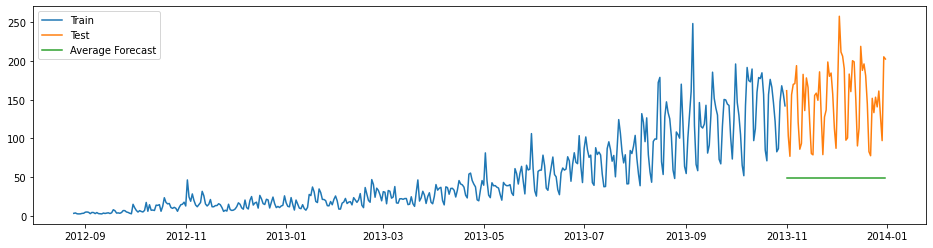

In [367]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Count'].mean()
plt.figure(figsize=(16,4))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

We will now calculate RMSE to check to accuracy of our model.



In [368]:
rms = sqrt(mean_squared_error(test.Count, y_hat_avg.avg_forecast))
print(rms)

109.88526527082863


## Method 3: Moving Average (MA)

Consider the graph given below. Let’s assume that the y-axis depicts the price of a coin and x-axis depicts the time(days).

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2018/02/mov_avg_new-768x531.png" alt="Drawing" style="width: 350px;"/>

We can infer from the graph that the prices of the coin increased some time periods ago by a big margin but now they are stable. Many a times we are provided with a dataset, in which the prices/sales of the object increased/decreased sharply some time periods ago. In order to use the  previous Average method, we have to use the mean of all the previous data, but using all the previous data doesn’t sound right.

Using the prices of the initial period would highly affect the forecast for the next period. Therefore as an improvement over simple average, we will take the average of the prices for last few time periods only. Obviously the thinking here is that only the recent values matter. Such forecasting technique which uses window of time period for calculating the average is called Moving Average technique. Calculation of the moving average involves what is sometimes called a “sliding window” of size n.

Using a simple moving average model, we forecast the next value(s) in a time series based on the average of a fixed finite number ‘p’ of the previous values. Thus, for all i > p

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2018/01/Screen-Shot-2018-01-25-at-7.47.33-PM.png" alt="Drawing" style="width: 300px;"/>

A moving average can actually be quite effective, especially if you pick the right p for the series.

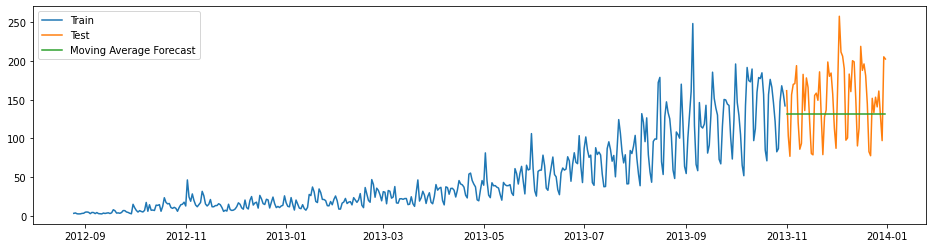

In [369]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['Count'].rolling(60).mean().iloc[-1]
plt.figure(figsize=(16,4))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

We chose the data of last 2 months only. We will now calculate RMSE to check to accuracy of our model.

In [328]:
rms = sqrt(mean_squared_error(test.Count, y_hat_avg.moving_avg_forecast))
print(rms)

2434770.69052119


We can see that Naive method outperforms both Average method and Moving Average method for this dataset. Now we will look at Simple Exponential Smoothing method and see how it performs.

An advancement over Moving average method is Weighted moving average method. In the Moving average method as seen above, we equally weigh the past ‘n’ observations. But we might encounter situations where each of the observation from the past ‘n’ impacts the forecast in a different way. Such a technique which weighs the past observations differently is called Weighted Moving Average technique.

A weighted moving average is a moving average where within the sliding window values are given different weights, typically so that more recent points matter more.

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2018/01/nnn-768x84.png" alt="Drawing" style="width: 420px;"/>

Instead of selecting a window size, it requires a list of weights (which should add up to 1). For example if we pick [0.40, 0.25, 0.20, 0.15] as weights, we would be giving 40%, 25%, 20% and 15% to the last 4 points respectively.

## Method 4: Simple Exponential Smoothing
#### $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ (for series with no trends or seasonality)

concept link- https://www.youtube.com/watch?v=k_HN0wOKDd0

After we have understood the above methods, we can note that both Simple average and Weighted moving average lie on completely opposite ends. We would need something between these two extremes approaches which takes into account all the data while weighing the data points differently. For example it may be sensible to attach larger weights to more recent observations than to observations from the distant past. The technique which works on this principle is called Simple exponential smoothing. Forecasts are calculated using weighted averages where the weights decrease exponentially as observations come from further in the past, the smallest weights are associated with the oldest observations:

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2018/01/Screen-Shot-2018-01-25-at-7.59.27-PM-768x90.png" alt="Drawing" style="width: 420px;"/>

where 0≤ α ≤1 is the smoothing parameter.

The one-step-ahead forecast for time T+1 is a weighted average of all the observations in the series y1,…,yT. The rate at which the weights decrease is controlled by the parameter α.

If you stare at it just long enough, you will see that the expected value ŷx is the sum of two products: α⋅yt and (1−α)⋅ŷ t-1.

Hence, it can also be written as :

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2018/01/Screen-Shot-2018-01-25-at-7.59.43-PM.png" alt="Drawing" style="width: 300px;"/>

So essentially we’ve got a weighted moving average with two weights: α and 1−α.

As we can see, 1−α is multiplied by the previous expected value ŷ x−1 which makes the expression recursive. And this is why this method is called Exponential. The forecast at time t+1 is equal to a weighted average between the most recent observation yt and the most recent forecast ŷ t|t−1.

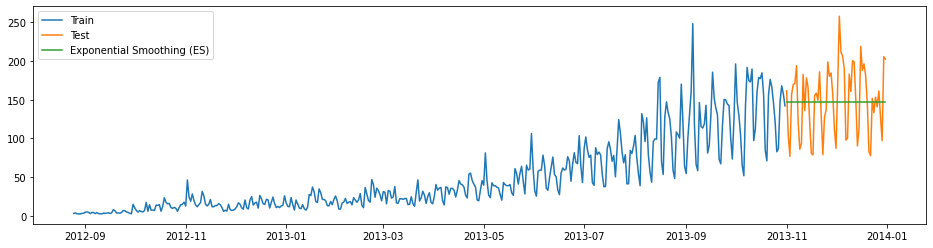

In [370]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

y_hat_avg = test.copy()
# fit2 = ExponentialSmoothing(np.asarray(train['Count']), seasonal_periods=52, trend='multiplicative', seasonal='multiplicative')
fit2 = ExponentialSmoothing(np.asarray(train['Count']))
fit2 = fit2.fit(smoothing_level=0.6, optimized=False)
# fit2 = fit2.predict(start='2012-01-08', end= '2012-10-28')
y_hat_avg['ES'] = fit2.forecast(len(test))

plt.figure(figsize=(16,4))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['ES'], label="Exponential Smoothing (ES)")
plt.legend(loc='best')
plt.show()


In [371]:
rms = sqrt(mean_squared_error(test.Count, y_hat_avg.ES))
print(rms)

43.357625225228155


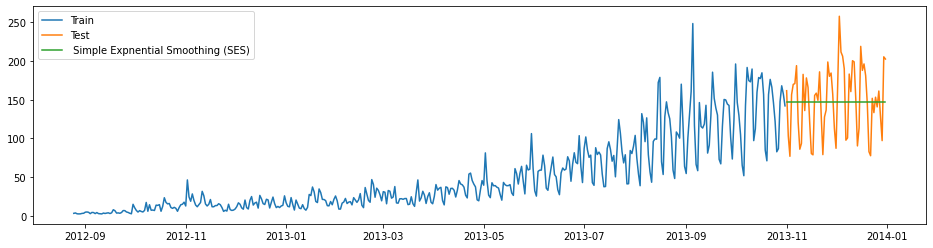

In [372]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['Count'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(16,4))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['SES'], label=' Simple Expnential Smoothing (SES)')
plt.legend(loc='best')
plt.show()

We will now calculate RMSE to check to accuracy of our model.

In [373]:
from statsmodels.tsa.api import adfuller
X = train['Count']

result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print()
    print("As",result[0], "<",result[4]["5%"])
    print ("Reject Ho - Time Series is Stationary")
else:
    print()
    print("As",round(result[0], 3), ">",round(result[4]["5%"], 3))
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: 0.306586
p-value: 0.977645
Critical Values:
	1%: -3.446
	5%: -2.869
	10%: -2.570

As 0.307 > -2.869
Failed to Reject Ho - Time Series is Non-Stationary


In [374]:
rms = sqrt(mean_squared_error(test.Count, y_hat_avg.SES))
print(rms)

43.357625225228155


We can see that implementing Simple exponential model with alpha as 0.6 generates a better model till now. We can tune the parameter using the validation set to generate even a better Simple exponential model.

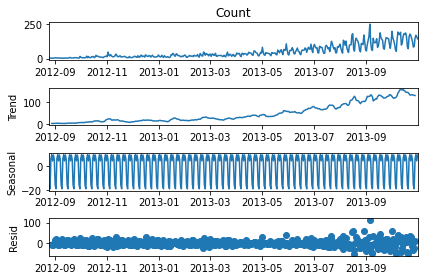

In [375]:
from statsmodels.tsa.api import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

res1 = seasonal_decompose(train['Count'])
res1.plot()

res2 = adfuller(train['Count'])
plt.show()

## Method 5: Holt's Exponential Smoothing (HES)

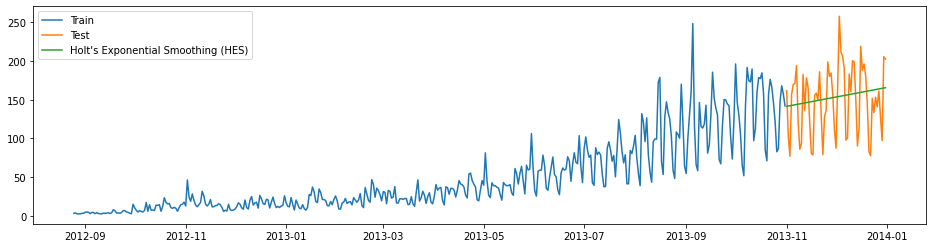

In [378]:
y_hat_avg = test.copy()

fit1 = Holt(np.asarray(train['Count']), exponential=False)
fit1 = fit1.fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(16,4))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label="Holt's Exponential Smoothing (HES)")
plt.legend(loc='best')
plt.show()

In [379]:
rms = sqrt(mean_squared_error(test.Count, y_hat_avg.Holt_linear))
print(rms)

43.056259611507286


## Method 6: Holt-Winter's Exponential Smoothing (WES)

/home/garvit/anaconda3/envs/time_series/lib/python3.7/site-packages/statsmodels-0.12.0.dev0+295.gf1ea5b3f6-py3.7-linux-x86_64.egg/statsmodels/tsa/holtwinters.py:1115: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



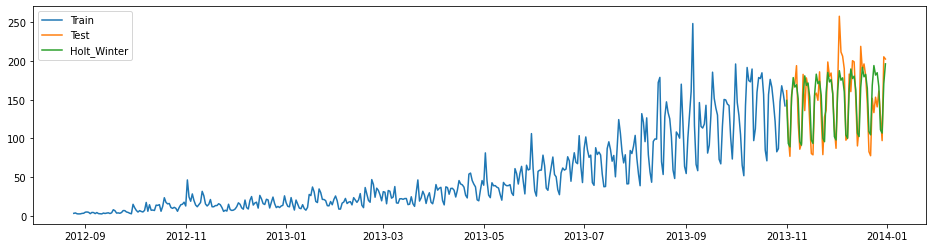

In [380]:
y_hat_avg = test.copy()

fit1 = ExponentialSmoothing(np.asarray(train['Count']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))

plt.figure(figsize=(16,4))
plt.plot( train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [381]:
rms = sqrt(mean_squared_error(test.Count, y_hat_avg.Holt_Winter))
print(rms)

23.961492566159794


# Regression Models

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

### Data

In [49]:
train = pd.read_csv('/home/garvit/Datasets/walmart-recruiting-store-sales-forecasting/train.csv')
stores = pd.read_csv('/home/garvit/Datasets/walmart-recruiting-store-sales-forecasting/stores.csv')
features = pd.read_csv('/home/garvit/Datasets/walmart-recruiting-store-sales-forecasting/features.csv')

# merging dataset
temp = pd.merge(left= train, right= features, on= ['Store', 'Date'], how= 'inner')
data = temp.merge(stores, on=['Store'], how = 'inner')

# droping duplicate column
data.drop('IsHoliday_y', axis = 1, inplace  = True)
data = data.rename(columns = {'IsHoliday_x' : 'IsHoliday'})

# handelling NaN values
data = data.fillna(0)
data = data.iloc[:20000,:]
# data = data[['Date', 'Weekly_Sales']].copy()
data = data[['Dept', 'Weekly_Sales']]


# # train and test dataset


# data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d %H:%M')
# data.rename(columns= {'Weekly_Sales':'Count'}, inplace=True)
# data.index = data['Date']
# data = data.drop(['Date'], 1)
# data = data.resample('W').sum()
# train = data.iloc[:104,:]
# test  = data.iloc[103:,:]

# train


In [50]:
data.head(3)

,Dept,Weekly_Sales
0,1,24924.50
1,2,50605.27
2,3,13740.12


### Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()

data = scaler.fit_transform(data)

X = data['Dept'].values.reshape(1,-1)
y = data['Weekly_Sales'].values.reshape(1,-1)



X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

regressor = LinearRegression()
regressor.fit(X_train, y_train)


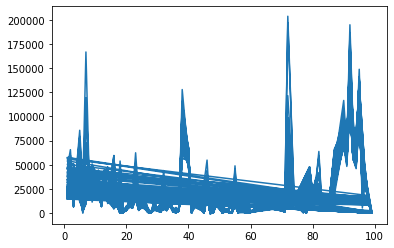

In [48]:
plt.plot(data['Dept'], data['Weekly_Sales'])

## Prophet

In [60]:
from fbprophet import Prophet

In [169]:
#Index 11856 marks the end of year 2013
df = pd.read_csv("/home/garvit/Datasets/forecasting/Time_Series_Analysis-master/Train.csv", nrows = 11856)

In [170]:
#Creating train and test set 
#Index 10392 marks the end of October 2013

train = df.iloc[0:10392,:]
test = df.iloc[10392:,:]

#Aggregating the dataset at daily level
df['Timestamp'] = pd.to_datetime(df['Datetime'], format='%d-%m-%Y %H:%M')
df.index = df['Timestamp']
df = df.resample('D').mean()
# df = df.resample('D').sum()

train['Timestamp'] = pd.to_datetime(train['Datetime'],format='%d-%m-%Y %H:%M') 
train.index = train['Timestamp'] 
train = train.resample('D').mean() 
# train = train.resample('D').sum()

test['Timestamp'] = pd.to_datetime(test['Datetime'],format='%d-%m-%Y %H:%M') 
test.index = test['Timestamp']
test = test.resample('D').mean()
# test = test.resample('D').sum()


<Figure size 1296x576 with 0 Axes>

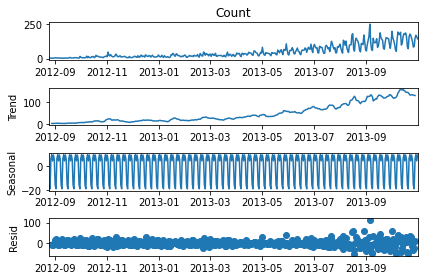

In [171]:
from statsmodels.tsa.api import seasonal_decompose

plt.figure(figsize=(18,8))
res = seasonal_decompose(train['Count'])
res.plot()
plt.show()

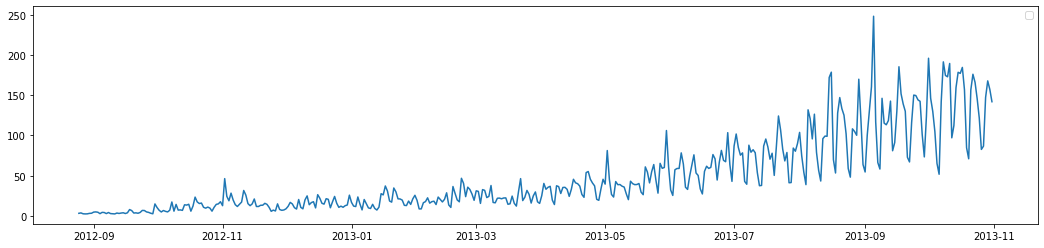

In [172]:
plt.figure(figsize=(18,4))
plt.plot(train['Count'])
plt.legend()
plt.show()

In [143]:
php = Prophet(daily_seasonality=True, weekly_seasonality=False, yearly_seasonality=False)
# php.add_seasonality(name='')
php.add_seasonality(name='monthly', period=100, fourier_order=10, prior_scale=0.02)

tmp = train.drop('ID', 1)
tmp = train.reset_index().rename(columns={'Timestamp':'ds', 'Count':'y'})
php.fit(tmp)

In [144]:
future = php.make_future_dataframe(periods=60, freq='D')
forecast = php.predict(future)

In [145]:
forecast.head(3)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,monthly,monthly_lower,monthly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-08-25,3.092516,-23.080886,29.481446,3.092516,3.092516,1.226490,1.226490,1.226490,-0.287983,-0.287983,-0.287983,1.514473,1.514473,1.514473,0.0,0.0,0.0,4.319006
1,2012-08-26,3.210499,-25.371005,28.831544,3.210499,3.210499,-0.129024,-0.129024,-0.129024,-0.287983,-0.287983,-0.287983,0.158958,0.158958,0.158958,0.0,0.0,0.0,3.081474
2,2012-08-27,3.328482,-23.901216,29.443988,3.328482,3.328482,-2.291626,-2.291626,-2.291626,-0.287983,-0.287983,-0.287983,-2.003643,-2.003643,-2.003643,0.0,0.0,0.0,1.036856


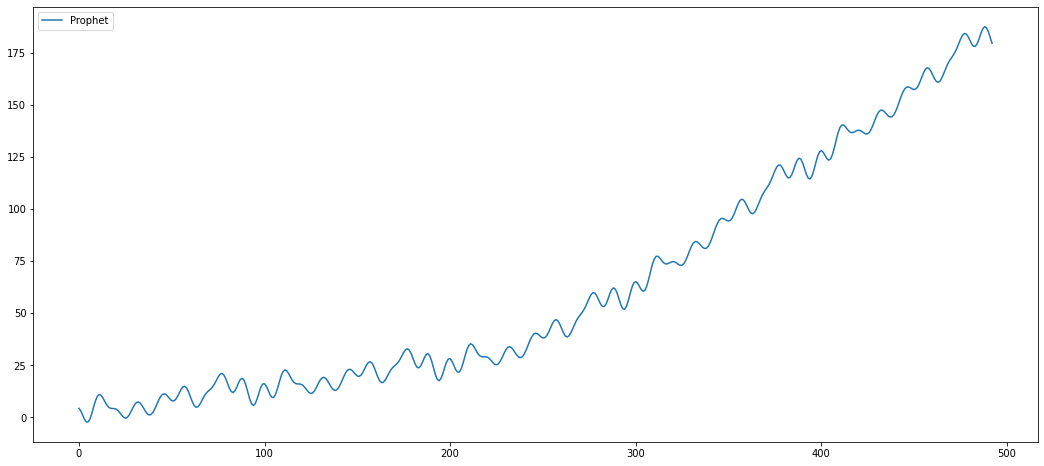

In [149]:
y_hat_prophit = test.copy()

# php.plot(forecast)
plt.figure(figsize=(18,8))
# plt.plot( train['Count'], label='Train')
# plt.plot(test['Count'], label='Test')
# plt.plot(test_data_w,'k', label = 'Test Actual Values', alpha = 0.8)
plt.plot(forecast['yhat'], label='Prophet')
plt.legend(loc='best')
plt.show()

In [107]:
# from fbprophet.plot import plot_plotly
# import plotly.offline as py
# import plotly.graph_objects as go
# py.init_notebook_mode()

# fig = plot_plotly(php, forecast)
# py.iplot(fig)